# ЛР3. Разработка свёрточной сети

In [1]:
%tensorflow_version 2.x
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp /content/gdrive/'My Drive'/datasets/asl-alphabet.zip .

import zipfile
with zipfile.ZipFile('asl-alphabet.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

### Описание датасета

[Набор данных ASL Alphabet](https://www.kaggle.com/grassknoted/asl-alphabet) представляет собой набор изображений из американского языка жестов. Набор обучающих данных содержит 87 000 изображений размером 200х200 пикселей. Есть 29 классов, из которых 26-для букв A-Z и 3 класса SPACE, DELETE и NOTHING. В каждом классе 3000 изображений.

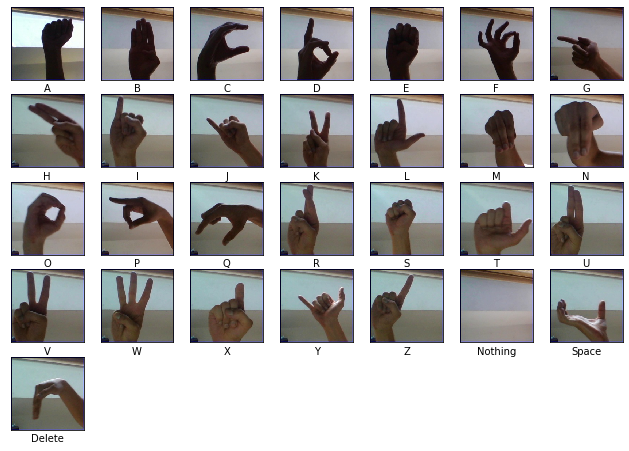

In [0]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'Nothing', 'Space', 'Delete']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = "test/{0}.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

### Загружаем данные

In [3]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    # Нормализуем данные
    images = images.astype('float32')/255.0
    # Преобразуем метки в one-hot-encoding
    labels = utils.to_categorical(labels)
    # Разделяем данные на тренировочную и тестовую выборки
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data('train/')
print('Loading:', time() - start)

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)
Loading: 65.13010692596436


### Запускаем сеть

In [0]:
classes = 29 # Количество классов изображений
batch = 128 # Размер мини-выборки
epochs = 5 # Количество эпох для обучения
learning_rate = 0.001 # Коэффициент скорости обучения

def results(model):
  adam = Adam(lr=learning_rate)

  # Компилируем модель
  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  # Обучаем модель
  start = time()
  history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  train_time = time() - start

  # Архитектура сети
  model.summary()

  # Графики изменения метрик
  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  # Запускаем на тестовых данных
  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)

#### Конфигурация №1

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 4s 62us/sample - loss: 2.5538 - accuracy: 0.2678 - val_loss: 1.9364 - val_accuracy: 0.4396
Epoch 2/5
70470/70470 [==============================] - 4s 55us/sample - loss: 1.6484 - accuracy: 0.5113 - val_loss: 1.4091 - val_accuracy: 0.5792
Epoch 3/5
70470/70470 [==============================] - 4s 59us/sample - loss: 1.1983 - accuracy: 0.6488 - val_loss: 1.0688 - val_accuracy: 0.6868
Epoch 4/5
70470/70470 [==============================] - 4s 59us/sample - loss: 0.8931 - accuracy: 0.7435 - val_loss: 0.7840 - val_accuracy: 0.7761
Epoch 5/5
70470/70470 [==============================] - 4s 55us/sample - loss: 0.6880 - accuracy: 0.8080 - val_loss: 0.6501 - val_accuracy: 0.8073
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 3)         8

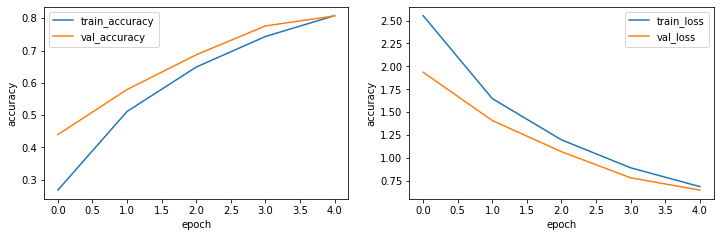

8700/8700 [==============================] - 1s 111us/sample - loss: 0.6403 - accuracy: 0.8069

Train time:  20.538649082183838
Test accuracy: 0.80689657
Test loss: 0.640324449566589
Test time:  1.0009641647338867


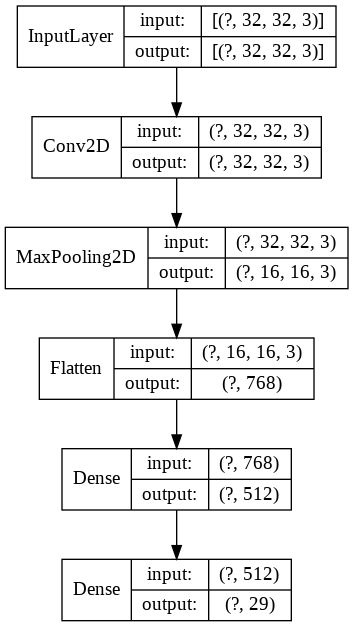

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(3, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №2

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 4s 62us/sample - loss: 2.5422 - accuracy: 0.2795 - val_loss: 1.9503 - val_accuracy: 0.4429
Epoch 2/5
70470/70470 [==============================] - 4s 56us/sample - loss: 1.5454 - accuracy: 0.5586 - val_loss: 1.2017 - val_accuracy: 0.6752
Epoch 3/5
70470/70470 [==============================] - 4s 56us/sample - loss: 0.9800 - accuracy: 0.7370 - val_loss: 0.7977 - val_accuracy: 0.7983
Epoch 4/5
70470/70470 [==============================] - 4s 55us/sample - loss: 0.6572 - accuracy: 0.8340 - val_loss: 0.5642 - val_accuracy: 0.8558
Epoch 5/5
70470/70470 [==============================] - 4s 56us/sample - loss: 0.4693 - accuracy: 0.8869 - val_loss: 0.4243 - val_accuracy: 0.8954
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 3)         8

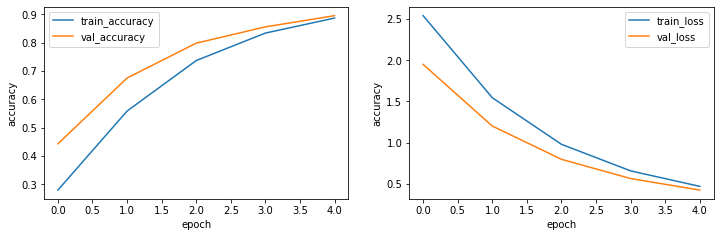

8700/8700 [==============================] - 1s 111us/sample - loss: 0.4221 - accuracy: 0.8949

Train time:  20.16337537765503
Test accuracy: 0.8949425
Test loss: 0.4220889133557506
Test time:  1.0049664974212646


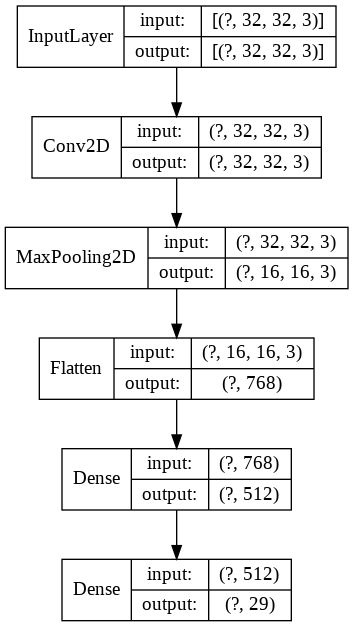

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(3, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №3

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 7s 97us/sample - loss: 1.6236 - accuracy: 0.5542 - val_loss: 0.7927 - val_accuracy: 0.7848
Epoch 2/5
70470/70470 [==============================] - 6s 88us/sample - loss: 0.5349 - accuracy: 0.8635 - val_loss: 0.3743 - val_accuracy: 0.9142
Epoch 3/5
70470/70470 [==============================] - 6s 87us/sample - loss: 0.2719 - accuracy: 0.9383 - val_loss: 0.2295 - val_accuracy: 0.9430
Epoch 4/5
70470/70470 [==============================] - 6s 86us/sample - loss: 0.1590 - accuracy: 0.9669 - val_loss: 0.1743 - val_accuracy: 0.9530
Epoch 5/5
70470/70470 [==============================] - 6s 87us/sample - loss: 0.0998 - accuracy: 0.9802 - val_loss: 0.1008 - val_accuracy: 0.9780
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 32, 32, 32)        8

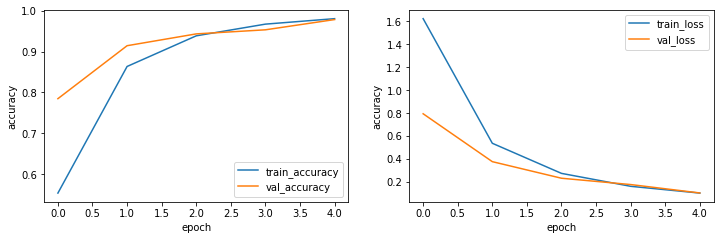

8700/8700 [==============================] - 1s 119us/sample - loss: 0.0963 - accuracy: 0.9772

Train time:  31.374992609024048
Test accuracy: 0.9772414
Test loss: 0.0963101595229116
Test time:  1.0720131397247314


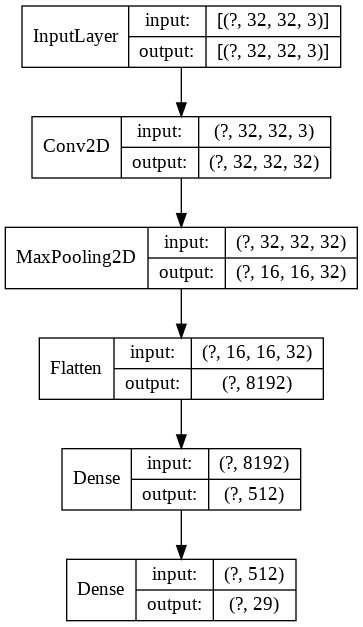

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №4

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 7s 104us/sample - loss: 1.7938 - accuracy: 0.5017 - val_loss: 0.9713 - val_accuracy: 0.7415
Epoch 2/5
70470/70470 [==============================] - 6s 87us/sample - loss: 0.6626 - accuracy: 0.8270 - val_loss: 0.4528 - val_accuracy: 0.8976
Epoch 3/5
70470/70470 [==============================] - 6s 88us/sample - loss: 0.3331 - accuracy: 0.9233 - val_loss: 0.2699 - val_accuracy: 0.9381
Epoch 4/5
70470/70470 [==============================] - 6s 87us/sample - loss: 0.1873 - accuracy: 0.9629 - val_loss: 0.1873 - val_accuracy: 0.9591
Epoch 5/5
70470/70470 [==============================] - 6s 87us/sample - loss: 0.1133 - accuracy: 0.9805 - val_loss: 0.1034 - val_accuracy: 0.9834
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 32, 32, 32)        

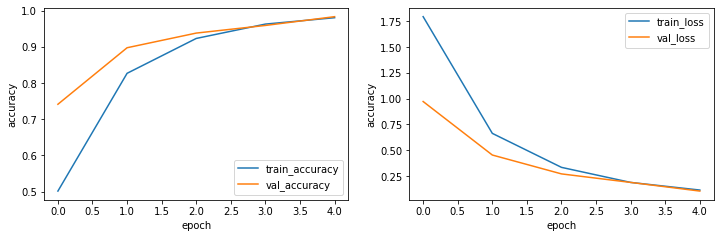

8700/8700 [==============================] - 1s 118us/sample - loss: 0.1004 - accuracy: 0.9820

Train time:  31.967360258102417
Test accuracy: 0.98195404
Test loss: 0.10036692585753298
Test time:  1.062239408493042


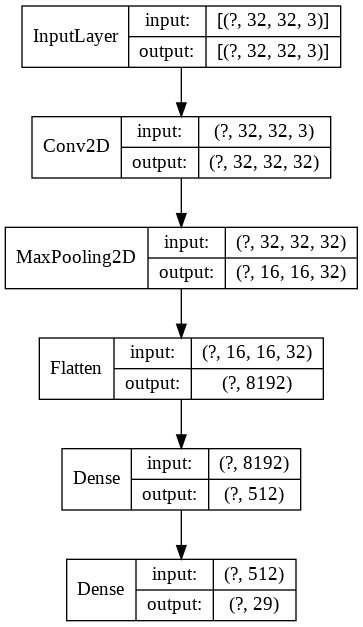

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №5

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 10s 143us/sample - loss: 1.4465 - accuracy: 0.6050 - val_loss: 0.5978 - val_accuracy: 0.8474
Epoch 2/5
70470/70470 [==============================] - 10s 136us/sample - loss: 0.3829 - accuracy: 0.9060 - val_loss: 0.2665 - val_accuracy: 0.9392
Epoch 3/5
70470/70470 [==============================] - 10s 138us/sample - loss: 0.1665 - accuracy: 0.9663 - val_loss: 0.1391 - val_accuracy: 0.9719
Epoch 4/5
70470/70470 [==============================] - 10s 136us/sample - loss: 0.0898 - accuracy: 0.9835 - val_loss: 0.0788 - val_accuracy: 0.9863
Epoch 5/5
70470/70470 [==============================] - 10s 137us/sample - loss: 0.0533 - accuracy: 0.9909 - val_loss: 0.0568 - val_accuracy: 0.9907
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 64

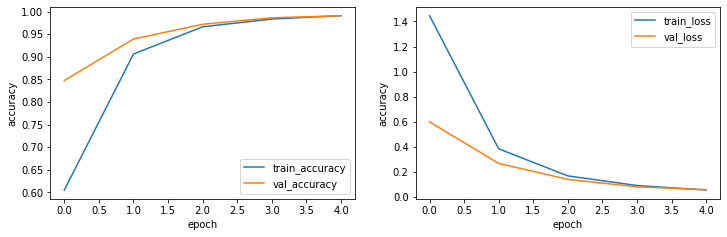

8700/8700 [==============================] - 1s 139us/sample - loss: 0.0527 - accuracy: 0.9908

Train time:  48.6657018661499
Test accuracy: 0.9908046
Test loss: 0.05269236600261995
Test time:  1.245274543762207


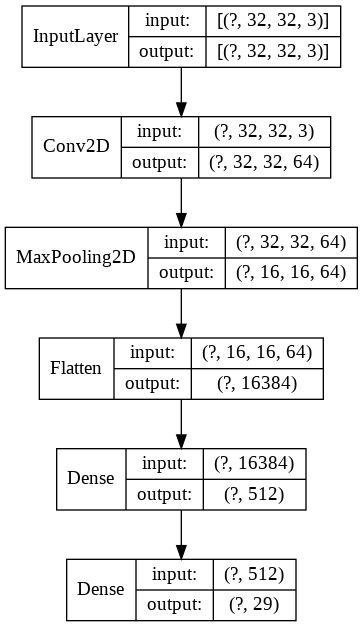

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №6

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 10s 144us/sample - loss: 1.6745 - accuracy: 0.5329 - val_loss: 0.8104 - val_accuracy: 0.7888
Epoch 2/5
70470/70470 [==============================] - 10s 139us/sample - loss: 0.5370 - accuracy: 0.8654 - val_loss: 0.3684 - val_accuracy: 0.9132
Epoch 3/5
70470/70470 [==============================] - 10s 137us/sample - loss: 0.2466 - accuracy: 0.9488 - val_loss: 0.1972 - val_accuracy: 0.9618
Epoch 4/5
70470/70470 [==============================] - 10s 137us/sample - loss: 0.1349 - accuracy: 0.9753 - val_loss: 0.1234 - val_accuracy: 0.9752
Epoch 5/5
70470/70470 [==============================] - 10s 135us/sample - loss: 0.0776 - accuracy: 0.9879 - val_loss: 0.0945 - val_accuracy: 0.9787
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 64

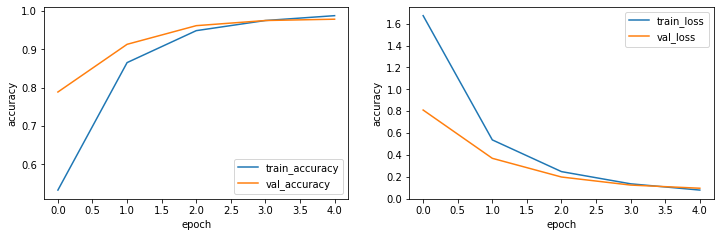

8700/8700 [==============================] - 1s 136us/sample - loss: 0.0839 - accuracy: 0.9824

Train time:  48.86165452003479
Test accuracy: 0.98241377
Test loss: 0.08391586633934371
Test time:  1.2211482524871826


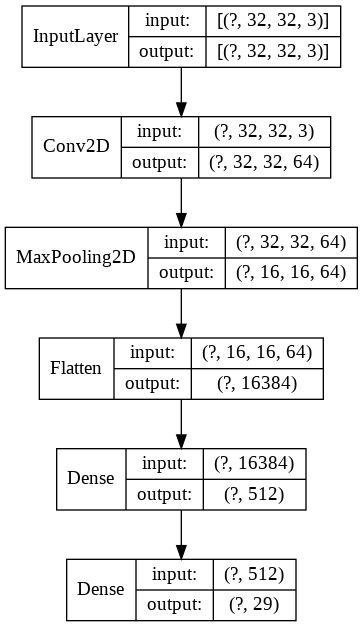

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №7

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 8s 118us/sample - loss: 1.5479 - accuracy: 0.5677 - val_loss: 0.5911 - val_accuracy: 0.8372
Epoch 2/5
70470/70470 [==============================] - 8s 109us/sample - loss: 0.3234 - accuracy: 0.9245 - val_loss: 0.1809 - val_accuracy: 0.9650
Epoch 3/5
70470/70470 [==============================] - 8s 109us/sample - loss: 0.1244 - accuracy: 0.9755 - val_loss: 0.0872 - val_accuracy: 0.9867
Epoch 4/5
70470/70470 [==============================] - 8s 110us/sample - loss: 0.0638 - accuracy: 0.9885 - val_loss: 0.0542 - val_accuracy: 0.9909
Epoch 5/5
70470/70470 [==============================] - 8s 108us/sample - loss: 0.0379 - accuracy: 0.9939 - val_loss: 0.0499 - val_accuracy: 0.9880
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 64)    

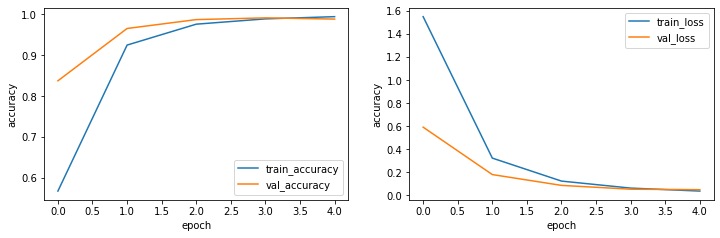

8700/8700 [==============================] - 1s 131us/sample - loss: 0.0516 - accuracy: 0.9879

Train time:  39.119179010391235
Test accuracy: 0.987931
Test loss: 0.05164146496475428
Test time:  1.1762042045593262


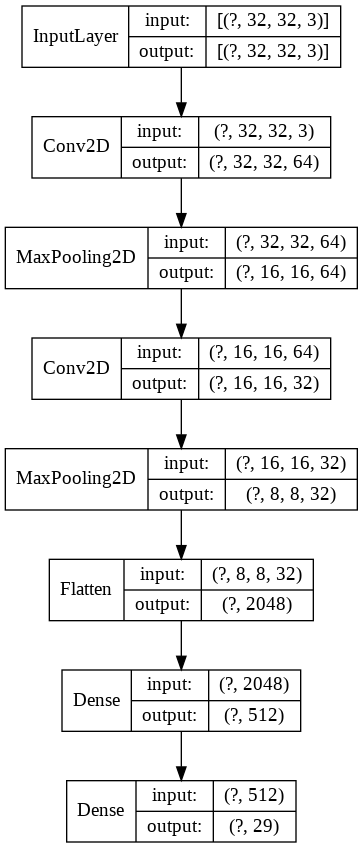

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №8

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 8s 117us/sample - loss: 1.6920 - accuracy: 0.5242 - val_loss: 0.7678 - val_accuracy: 0.7962
Epoch 2/5
70470/70470 [==============================] - 8s 109us/sample - loss: 0.4655 - accuracy: 0.8870 - val_loss: 0.2923 - val_accuracy: 0.9337
Epoch 3/5
70470/70470 [==============================] - 8s 110us/sample - loss: 0.1967 - accuracy: 0.9606 - val_loss: 0.1404 - val_accuracy: 0.9761
Epoch 4/5
70470/70470 [==============================] - 8s 110us/sample - loss: 0.1040 - accuracy: 0.9825 - val_loss: 0.0845 - val_accuracy: 0.9817
Epoch 5/5
70470/70470 [==============================] - 8s 110us/sample - loss: 0.0580 - accuracy: 0.9915 - val_loss: 0.0518 - val_accuracy: 0.9902
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 32, 32, 64)    

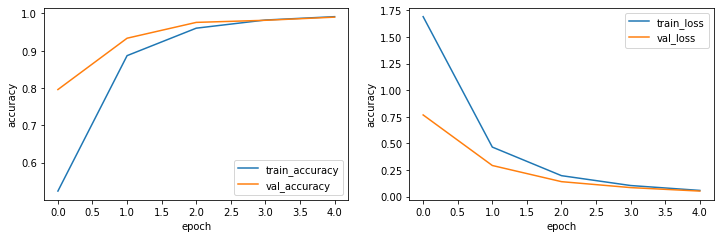

8700/8700 [==============================] - 1s 124us/sample - loss: 0.0484 - accuracy: 0.9924

Train time:  39.20389914512634
Test accuracy: 0.9924138
Test loss: 0.048387940058420446
Test time:  1.114734411239624


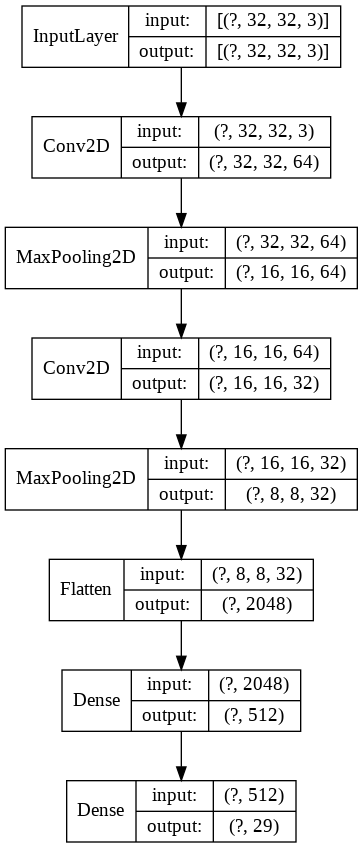

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №9

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 10s 141us/sample - loss: 1.3019 - accuracy: 0.6377 - val_loss: 0.4177 - val_accuracy: 0.8944
Epoch 2/5
70470/70470 [==============================] - 9s 131us/sample - loss: 0.2423 - accuracy: 0.9469 - val_loss: 0.1546 - val_accuracy: 0.9654
Epoch 3/5
70470/70470 [==============================] - 9s 134us/sample - loss: 0.0941 - accuracy: 0.9831 - val_loss: 0.0679 - val_accuracy: 0.9879
Epoch 4/5
70470/70470 [==============================] - 9s 131us/sample - loss: 0.0490 - accuracy: 0.9916 - val_loss: 0.0513 - val_accuracy: 0.9904
Epoch 5/5
70470/70470 [==============================] - 9s 131us/sample - loss: 0.0310 - accuracy: 0.9948 - val_loss: 0.0472 - val_accuracy: 0.9894
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 64)   

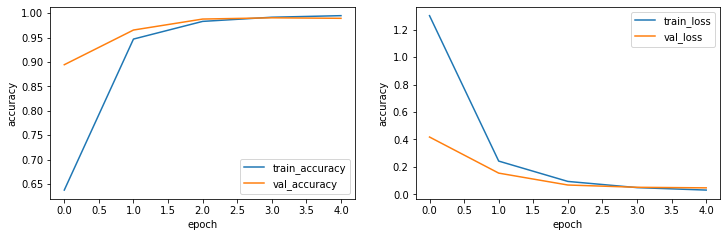

8700/8700 [==============================] - 1s 135us/sample - loss: 0.0485 - accuracy: 0.9884

Train time:  47.14348030090332
Test accuracy: 0.9883908
Test loss: 0.048493567525312815
Test time:  1.215036392211914


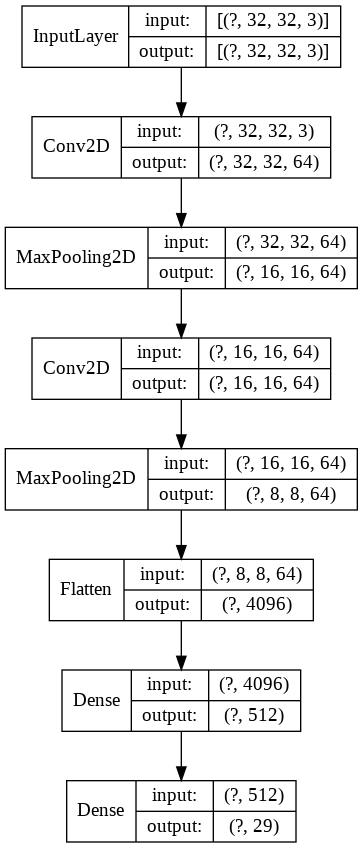

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №10

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 10s 140us/sample - loss: 1.4550 - accuracy: 0.5926 - val_loss: 0.5942 - val_accuracy: 0.8478
Epoch 2/5
70470/70470 [==============================] - 9s 131us/sample - loss: 0.3351 - accuracy: 0.9242 - val_loss: 0.2040 - val_accuracy: 0.9626
Epoch 3/5
70470/70470 [==============================] - 9s 132us/sample - loss: 0.1296 - accuracy: 0.9765 - val_loss: 0.1000 - val_accuracy: 0.9812
Epoch 4/5
70470/70470 [==============================] - 9s 132us/sample - loss: 0.0668 - accuracy: 0.9900 - val_loss: 0.0702 - val_accuracy: 0.9866
Epoch 5/5
70470/70470 [==============================] - 9s 131us/sample - loss: 0.0357 - accuracy: 0.9955 - val_loss: 0.0358 - val_accuracy: 0.9951
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 64)   

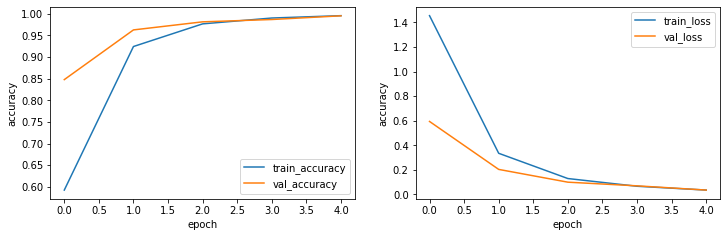

8700/8700 [==============================] - 1s 133us/sample - loss: 0.0341 - accuracy: 0.9956

Train time:  46.98927903175354
Test accuracy: 0.9956322
Test loss: 0.03405862691929971
Test time:  1.1930272579193115


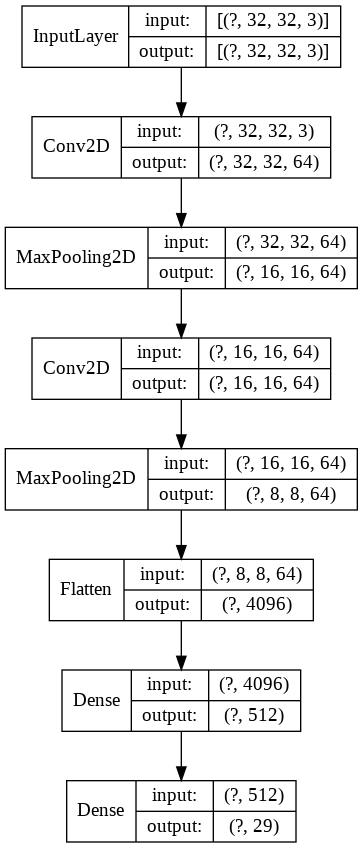

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №11

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 24s 336us/sample - loss: 1.2658 - accuracy: 0.6439 - val_loss: 0.3241 - val_accuracy: 0.9257
Epoch 2/5
70470/70470 [==============================] - 23s 324us/sample - loss: 0.1909 - accuracy: 0.9584 - val_loss: 0.1174 - val_accuracy: 0.9748
Epoch 3/5
70470/70470 [==============================] - 23s 324us/sample - loss: 0.0676 - accuracy: 0.9892 - val_loss: 0.0487 - val_accuracy: 0.9935
Epoch 4/5
70470/70470 [==============================] - 23s 325us/sample - loss: 0.0356 - accuracy: 0.9948 - val_loss: 0.0231 - val_accuracy: 0.9971
Epoch 5/5
70470/70470 [==============================] - 23s 326us/sample - loss: 0.0216 - accuracy: 0.9970 - val_loss: 0.0239 - val_accuracy: 0.9974
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 32, 32, 25

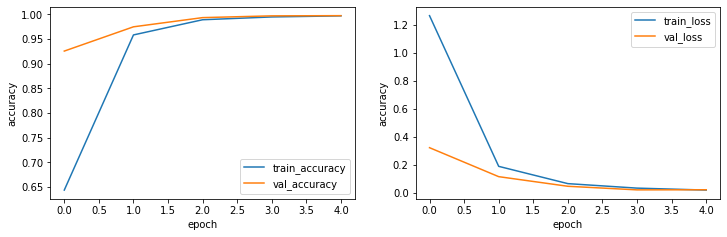

8700/8700 [==============================] - 2s 224us/sample - loss: 0.0194 - accuracy: 0.9991

Train time:  115.2612075805664
Test accuracy: 0.9990805
Test loss: 0.01943378283203333
Test time:  1.9822778701782227


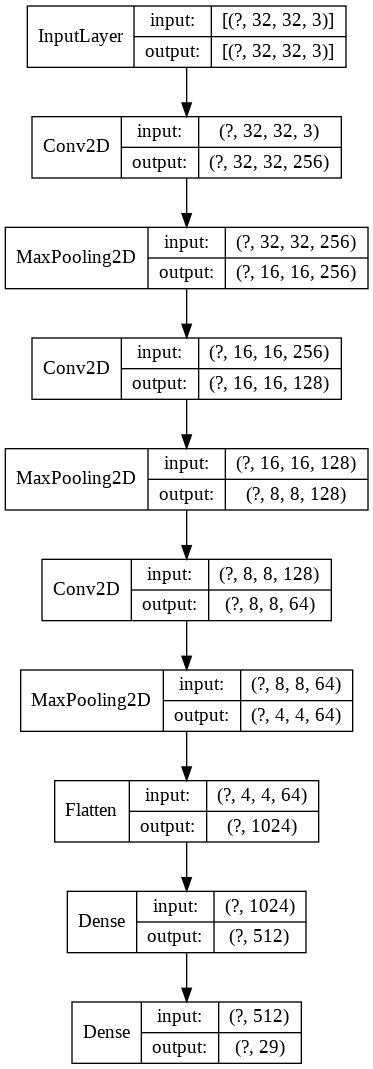

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### Конфигурация №12

Train on 70470 samples, validate on 7830 samples
Epoch 1/5
70470/70470 [==============================] - 24s 337us/sample - loss: 1.2481 - accuracy: 0.6558 - val_loss: 0.3149 - val_accuracy: 0.9318
Epoch 2/5
70470/70470 [==============================] - 23s 329us/sample - loss: 0.1633 - accuracy: 0.9690 - val_loss: 0.0788 - val_accuracy: 0.9881
Epoch 3/5
70470/70470 [==============================] - 23s 327us/sample - loss: 0.0487 - accuracy: 0.9939 - val_loss: 0.0304 - val_accuracy: 0.9972
Epoch 4/5
70470/70470 [==============================] - 23s 328us/sample - loss: 0.0281 - accuracy: 0.9963 - val_loss: 0.0252 - val_accuracy: 0.9973
Epoch 5/5
70470/70470 [==============================] - 23s 330us/sample - loss: 0.0177 - accuracy: 0.9972 - val_loss: 0.0322 - val_accuracy: 0.9911
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 32, 32, 25

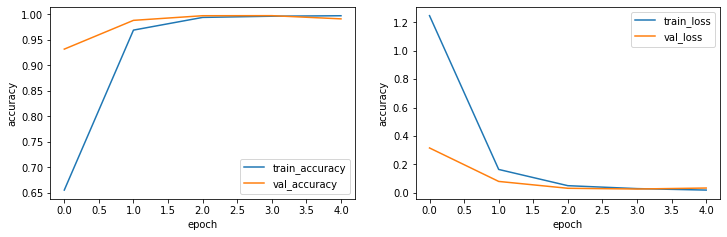

8700/8700 [==============================] - 2s 224us/sample - loss: 0.0315 - accuracy: 0.9923

Train time:  116.44202876091003
Test accuracy: 0.99229884
Test loss: 0.031468986491190974
Test time:  1.9800128936767578


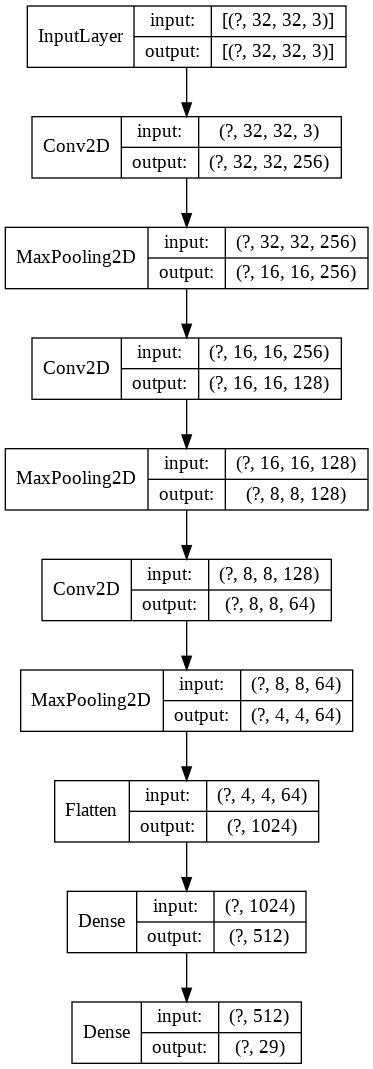

In [0]:
# Создаём модель
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)
utils.plot_model(model, show_shapes=True, show_layer_names=False)